In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return 1 + 2*x - 2*x**2

### Did you know?


**You can solve linear regression in 3 lines of code. There is an inbuilt function in numpy called
linalg that SAVES LIVES (of Statisticians atleast).**


[[1.         0.14285714 0.02040816]
 [1.         0.28571429 0.08163265]
 [1.         0.42857143 0.18367347]
 [1.         0.57142857 0.32653061]
 [1.         0.71428571 0.51020408]
 [1.         0.85714286 0.73469388]
 [1.         1.         1.        ]]


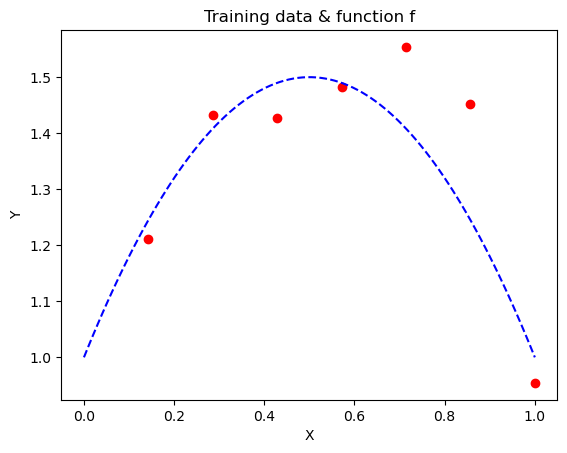

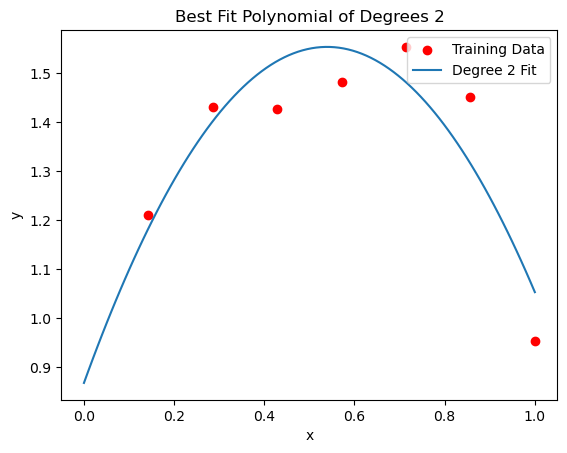

In [7]:
noise = np.random.normal(0,1,7)
X, Y, F = [], [], []
for i in range(7):
    x = (i+1)/7
    y = f(x)
    X.append(x)
    F.append(y)
    Y.append(y + 0.1*noise[i])

plt.figure()
plt.scatter(X, Y, label='Training Data', color='red')
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y, label='True Function', linestyle='--', color='blue')
plt.title("Training data & function f")
plt.xlabel("X")
plt.ylabel("Y")

d = 2

degrees = np.arange(7)
MSE, MSE_test = [], []
X_copy = X
x_test, y_test, f_test = [], [], []
noise = np.random.normal(0, 1, 1000) # guassian noise - mean 0, standard deviation 1. I am sampling 1000 points from this distribution.
for idx in range(1000):
    xVal = (idx+1)/1000
    fVal = f(xVal)
    yVal = fVal + 0.1*noise[idx]
    x_test.append(xVal)
    y_test.append(yVal)

# Solve for our parameters.
X = np.vander(X_copy, d+1, increasing=True)
# print(X)
theta = np.linalg.solve(X.T @ X, X.T @ Y) # Yup, thats it :)
y_fit = np.polyval(np.flip(theta), x)

plt.figure()
plt.scatter(X_copy, Y, label='Training Data', color='red')
plt.plot(x, y_fit, label=f'Degree {d} Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Polynomial of Degrees ' + str(d))
plt.legend()

## Homework: Can you figure out what np.polyval and np.vander is doing here?

### But we are computer scientits destined to learn gradient descent!

x = [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8

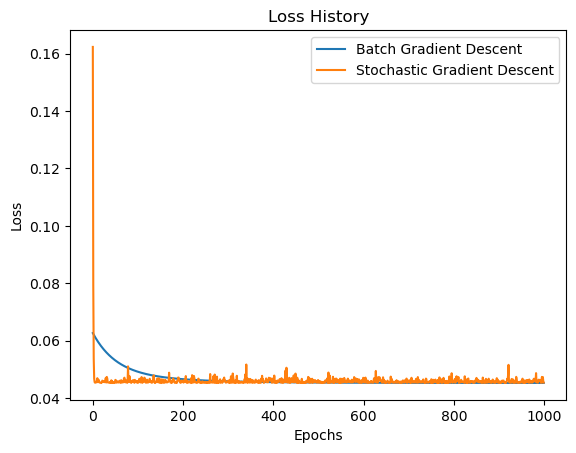

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
def f(X, n_samples=100):
    np.random.seed(42)
    y = 1 + 2 * X  # f(x) = 1 + 2x (True function)
    y = y.ravel()  # Flatten y to 1D
    return y

def fit(X, theta):
    return np.dot(X, theta)

# Compute Loss (mean squared error)
def compute_Loss(X, y, theta):
    m = len(y)
    predictions = fit(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])  # Initialize random parameters
    Loss_history = []

    for epoch in range(epochs):
        gradients = (1 / m) * np.dot(X.T, fit(X, theta) - y)  # Gradient
        theta -= learning_rate * gradients  # Update parameters
        Loss = compute_Loss(X, y, theta)
        Loss_history.append(Loss)

    return theta, Loss_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.1, epochs=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1])  # Initialize random values
    Loss_history = []

    for epoch in range(epochs):
        for i in range(m):
            random_idx = np.random.randint(m)
            xi = X[random_idx:random_idx + 1]  # Select one sample
            yi = y[random_idx:random_idx + 1]
            gradients = 2 * xi.T.dot(fit(xi, theta) - yi)  # Gradient for one sample
            theta -= learning_rate * gradients  # Update parameters
        Loss = compute_Loss(X, y, theta)
        Loss_history.append(Loss)

    return theta, Loss_history

# Main
X = 2 * np.random.rand(100, 1) - 1  # 100 samples of random values between -1 and 1
y = f(x, n_samples=100)
X = np.c_[np.ones((X.shape[0], 1)), X]
print(X)
print(y)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Batch Gradient Descent
theta_batch, Loss_history_batch = batch_gradient_descent(X, y, learning_rate, epochs)
print("Curve parameters (Batch GD):", theta_batch)

# Stochastic Gradient Descent
theta_sgd, Loss_history_sgd = stochastic_gradient_descent(X, y, learning_rate, epochs)
print("Curve parameters (SGD):", theta_sgd)

# Plot Loss history for both methods
plt.plot(Loss_history_batch, label='Batch Gradient Descent')
plt.plot(Loss_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

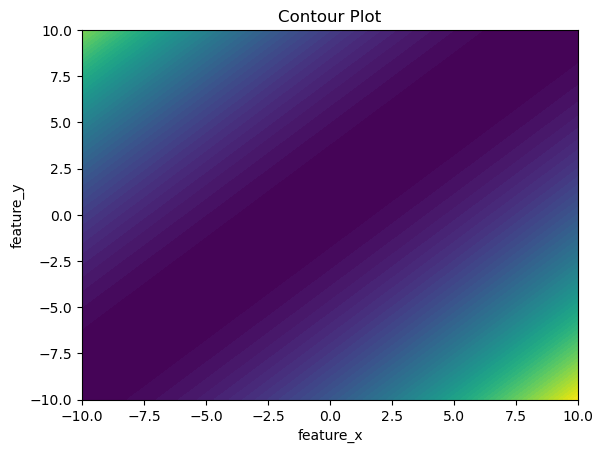

In [24]:
# Level Plot of MSE with 2 parameters

import matplotlib.pyplot as plt 
import numpy as np 

def make_mse(x, y):  
  def mse(t0,t1): 
    return np.power(x.dot(t0) + t1 - y, 2)
  return mse 

feature_x = np.arange(0, 50, 2) 
feature_y = np.arange(0, 50, 3) 
  
# Creating 2-D grid of features 
x = np.linspace(-5,5,500)
y = 1+2*x
# x = np.c_[np.ones((x.shape[0], 1)), x]
  
fig, ax = plt.subplots(1, 1) 
xcoord = np.linspace(-10.0,10.0,500)
ycoord = np.linspace(-10.0,10.0,500)
t0,t1 = np.meshgrid(xcoord,ycoord)

Z = make_mse(x,y)(t0,t1)
plt.contourf(t0,t1,Z, levels = 70)
  
ax.set_title('Contour Plot') 
ax.set_xlabel('feature_x') 
ax.set_ylabel('feature_y') 
plt.scatter(theta_batch)
plt.show() 